# Local Search

## Without Archive

In [845]:
# Check if solution meets the constraints and is feasable. Return -1 for infeasable solutions
def isfeasable(s):
    #Constraint calculation
    total = s[0] + 2*s[1] + 3*s[2] + 2*s[3] + 3*s[4] + 4*s[5] + s[6] + 5*s[7] + 3*s[8]
    if(total <= 16):
        return True
    else:
        return False
    
# Function to pick solution with best objective function value
def pickBest(z):
    # find the maximum value in the list of z values
    max_value = max(z)
    # find the index of the item that contains the maximum value
    max_index = z.index(max_value)
    return max_value, max_index

# Starting conditions
s_0_1 = [0, 1, 1, 1, 0, 0, 1, 1, 1]
s_0_2 = [0, 1, 0, 1, 0, 0, 0, 1, 0]
starting_list = [s_0_1,s_0_2]

for start in starting_list:
    print("========================================================================")
    print("Initial Condition:{0}".format(start))
    print("========================================================================")
    t = 0
    #S @ time t
    s = start
    # Value of the objective function
    z = 8*s[0] + 11*s[1] + 9*s[2] + 12*s[3] + 14*s[4] + 10*s[5] + 6*s[6] + 7*s[7] + 13*s[8]
    #Placeholder for decision vector with best z
    s_cap = s
    #Placeholder for z value of best decision vector
    z_cap = z
    # List of neighborhoods
    size = len(s_0_1)
    neigh_list = []
    z_neigh = []
    archive = [s]
    end_state = 0
    while( not end_state):
        #Bit complement shift by 1 for each new solution in the neighborhood
        for i in range (0, size):
            #Create a copy of the list to prevent change of the original data structure
            shallowCopy = s.copy()
            #Add the solution to the list of neighborhoods being generated for this time
            neigh_list.append(shallowCopy)
            #Get the original bit at location i where the single-bit complement will be applied
            val = shallowCopy[i]
            #If the bit is 0 it will be turned into a 1 and vise-versa
            val = 1 - val
            #Replace the original form with the complemented form
            neigh_list[i][i] = val
            #Generate a temp variable to calculate objective function value with current solution
            z_temp = 8*neigh_list[i][0] + 11*neigh_list[i][1] + 9*neigh_list[i][2] + 12*neigh_list[i][3] \
            + 14*neigh_list[i][4] + 10*neigh_list[i][5] + 6*neigh_list[i][6] + 7*neigh_list[i][7] \
            + 13*neigh_list[i][8]
            if(isfeasable(neigh_list[i])):
                #Append the value if it meets the constraints of the problem
                z_neigh.append(z_temp)
            else:
                #Append -1 instead if the contraints are not met to indicate an infeasable solution
                z_neigh.append(-1)

        #Return the solution in the neighborhood with the best z value and return the index
        max_val, max_index = pickBest(z_neigh)
        
        #Update candidate solution if better solution is found
        if(max_val>z_cap):
            z_cap = max_val
            s_cap = neigh_list[max_index]
        else:
            end_state = 1
            
        print("t:{0},s:{1},z:{2}".format(t,s,z))
        print("best s:{0},best z:{1}".format(s_cap,z_cap))
        for i,j in zip(neigh_list,z_neigh):
            print("Neighbour:{0},Z-value:{1},Bit:{2}".format(i,j,neigh_list.index(i)))
        
        #Compare max val with current cap values and replace if greater then solution found before
        s = neigh_list[max_index]
        z = z_cap
        


        #reset variables
        neigh_list = []
        z_neigh = []
        t = t+1
        
        print("========================================================================")

Initial Condition:[0, 1, 1, 1, 0, 0, 1, 1, 1]
t:0,s:[0, 1, 1, 1, 0, 0, 1, 1, 1],z:58
best s:[0, 1, 1, 1, 0, 0, 1, 1, 1],best z:58
Neighbour:[1, 1, 1, 1, 0, 0, 1, 1, 1],Z-value:-1,Bit:0
Neighbour:[0, 0, 1, 1, 0, 0, 1, 1, 1],Z-value:47,Bit:1
Neighbour:[0, 1, 0, 1, 0, 0, 1, 1, 1],Z-value:49,Bit:2
Neighbour:[0, 1, 1, 0, 0, 0, 1, 1, 1],Z-value:46,Bit:3
Neighbour:[0, 1, 1, 1, 1, 0, 1, 1, 1],Z-value:-1,Bit:4
Neighbour:[0, 1, 1, 1, 0, 1, 1, 1, 1],Z-value:-1,Bit:5
Neighbour:[0, 1, 1, 1, 0, 0, 0, 1, 1],Z-value:52,Bit:6
Neighbour:[0, 1, 1, 1, 0, 0, 1, 0, 1],Z-value:51,Bit:7
Neighbour:[0, 1, 1, 1, 0, 0, 1, 1, 0],Z-value:45,Bit:8
Initial Condition:[0, 1, 0, 1, 0, 0, 0, 1, 0]
t:0,s:[0, 1, 0, 1, 0, 0, 0, 1, 0],z:30
best s:[0, 1, 0, 1, 1, 0, 0, 1, 0],best z:44
Neighbour:[1, 1, 0, 1, 0, 0, 0, 1, 0],Z-value:38,Bit:0
Neighbour:[0, 0, 0, 1, 0, 0, 0, 1, 0],Z-value:19,Bit:1
Neighbour:[0, 1, 1, 1, 0, 0, 0, 1, 0],Z-value:39,Bit:2
Neighbour:[0, 1, 0, 0, 0, 0, 0, 1, 0],Z-value:18,Bit:3
Neighbour:[0, 1, 0, 1, 1,

## With Archive

In [158]:
# Check if solution meets the constraints and is feasable. Return -1 for infeasable solutions
def isfeasable(s):
    total = s[0] + 2*s[1] + 3*s[2] + 2*s[3] + 3*s[4] + 4*s[5] + s[6] + 5*s[7] + 3*s[8]
    #print(total)
    if(total <= 16):
        return True
    else:
        return False

def isArchived(neigh, archive):
    #print("isArchived")
    #print("neighboorhood")
    #print(neigh)
    #print("archive")
    #print(archive)
    overlapping_indices = []
    for i, neigh_list in enumerate(neigh):
        for archive_list in archive:
            #print("archive_list")
            #print(archive_list)
            #print("neigh_list")
            #print(neigh_list)
            if archive_list == neigh_list:
                overlapping_indices.append(i)
                break  # Skip further comparisons for this archive list
    #print("overlapping_indices")
    #print(overlapping_indices)
    return overlapping_indices


    
def pickBest(z,indices):
    # replace archived z values with -1
    for j in indices:
        z[j] = -2
    print(z)
    #Removed archived
    max_value = max(z)
    max_index = z.index(max_value)
    return max_value, max_index
    #Return index of n wher n is in a
    
    #Pick best z 
while( not end_state):
    print("===================")
    print("t:{0},s:{1},z:{2},s_cap:{3},z_cap:{4}".format(t,s,z,s_cap,z_cap))
    #Bit complement shift by 1 for each new solution
    for i in range (0, size):
        shallowCopy = s.copy()
        neigh_list.append(shallowCopy)
        #print (s)
        val = shallowCopy[i]
        val = 1 - val
        neigh_list[i][i] = val

        z_temp = 8*neigh_list[i][0] + 11*neigh_list[i][1] + 9*neigh_list[i][2] + 12*neigh_list[i][3] + 14*neigh_list[i][4] + 10*neigh_list[i][5] + 6*neigh_list[i][6] + 7*neigh_list[i][7] + 13*neigh_list[i][8]
        if(isfeasable(neigh_list[i])):
            z_neigh.append(z_temp)
        else:
            z_neigh.append(-1)
    archived_indices = isArchived(neigh_list,archive)
    max_val, max_index = pickBest(z_neigh, archived_indices)
    print("Maxval" )
    print(max_val)

    #Compare max val with current cap values and replace if greater
    archive.append(neigh_list[max_index])
    s = neigh_list[max_index]
    if(max_val>z_cap):
        z_cap = max_val
        s_cap = neigh_list[max_index]

    #Check if endstate reached
    temp = 0
    for a in z_neigh:
        print(a)
        if a!= -1 and a!=-2:
            temp = 1
    if(temp==0):
        end_state = 1
    
    # List of z values
    #z_neigh

    #resetvars
    neigh_list = []
    z_neigh = []
    t = t+1

# Q2 PSO

In [849]:
import math
import copy

#Function to calculate objective function and generate pi and pg values for each time instance
def objective_func(swarm,p_i,p_g):
    pi_list = p_i
    z_track = []
    pg_list = []
    index = 0
    
    for particle in swarm:
        #Objective value for particle
        obj_value_particle = (particle["pos"][0] - 3.14)**2 + (particle["pos"][1] - 2.72)**2 \
        + math.sin(3*particle["pos"][0]+1.41) + math.sin(4*particle["pos"][1]+1.73)
        #Previous objective value calculated for particle
        prev_obj_value = math.pow((p_i[index]["pos"][0] - 3.14),2) \
        + math.pow((p_i[index]["pos"][1] - 2.72),2) + math.sin(3*p_i[index]["pos"][0]+1.41) \
        + math.sin(4*p_i[index]["pos"][1]+1.73)
        #If a better value is found update the pi value of the particle
        if(obj_value_particle < prev_obj_value):
            print("Particle nr: {0}, Objective value:{1:0.3f}. \
            Personal best for particle {0}, Pi updated.".format(index,obj_value_particle))
            pi_list[index] = {"pos":particle["pos"]}
            #Track all new new pi values
            z_track.append(obj_value_particle)
        else:
            print("Particle nr: {0}, Objective value:{1:0.3f}".format(index,obj_value_particle))
            z_track.append(prev_obj_value)
        index = index + 1
    #Calculate pg value based on new list of pi values
    minimum = min(z_track)
    global_index = z_track.index(minimum)
    #Update pg value if better value is found then before
    pg_list = pi_list[global_index]
    if(pg_list != p_g):
        print("Collective best performance. Global pg value has been updated from {0} to: {1}"\
              .format(round_dictionary(p_g),round_dictionary(pg_list)))
    
    #Return pi and pg values
    return pi_list, pg_list

#Function to calculate velocities of particles
def velocities(swarm,p_i,p_g,w,p1,p2,c1,c2):
    vel_list = []
    index=0
    #Calculate velocities for each particle in swarm
    for particle in swarm:
        #Split up velocity equation into multiple parts
        part1 = [w * i for i in particle["vel"]]
        #Subtract positions with position data across two lists pi
        temp1 = [a_i - b_i for a_i, b_i in zip(p_i[index]["pos"],particle["pos"])]
        multi1 = p1*c1
        part2 = [multi1*i for i in temp1]
        #Subtract positions with position data across two lists pg
        temp2 = [a_i - b_i for a_i, b_i in zip(p_g["pos"],particle["pos"])] 
        part3 = [p2*c2*i for i in temp2]
        #Add all 3 terms from 3 parts together as per velocity formula
        vel = [x + y + z for x, y, z in zip(part1, part2, part3)]
        #Update the particle velocity with new value
        particle["vel"]=vel
        vel_list.append(vel)
        index = index + 1
    
    #Return calculated velocity list
    return vel_list

#Function to update the location of particles
def update_location(swarm,velocities):
    index=0
    list_of_locations = []
    for particles in swarm:
        #Add velocity and position for each particle for new position value
        particles["pos"] = [a + b for a, b in zip(particles["pos"],velocities[index])]
        index = index + 1
        #Add all new locations to list
        list_of_locations.append(particles["pos"])
    
    #Return list of locations
    return list_of_locations

#Function to initialize the swarm and p_i and p_g values
def initialize(swarm,p_i,p_g):
    pi_list = p_i
    z_track = []
    pg_list = []
    index = 0
    
    #Calculate the objective value for each particle in the swarm
    for particle in swarm:
        #Initialize the pi values to the locations of the swarm at t=0
        pi_list[index] = {"pos":particle["pos"]}
        obj_value_particle = math.pow((particle["pos"][0] - 3.14),2) \
        + math.pow((particle["pos"][1] - 2.72),2) \
        + math.sin(3*particle["pos"][0]+1.41) \
        + math.sin(4*particle["pos"][1]+1.73)
        #Store objective values of all particles
        z_track.append(obj_value_particle)
        index = index + 1
    
    #Return minimum objective value
    minimum = min(z_track)
    #Store index of particle with minimum objective value
    global_index = z_track.index(minimum)
    #Update pg value with particle with lowest objective value at t=0
    pg_list = pi_list[global_index]

    #return pi and pg values
    return pi_list, pg_list 

#Function that rounds values in a dictionary to 3 decimal places
def round_dictionary (particle):
    #Round values of positioning data
    x1=round(particle['pos'][0],3)
    x2=round(particle['pos'][1],3)
    modified_particle = {}
    #If dicitionary contains velocity data round those values
    if(particle.get('vel') != None):
        v1=round(particle['vel'][0],3)
        v2=round(particle['vel'][1],3)
        modified_particle = {'pos': [x1, x2], 'vel': [v1, v2]}
    else:
        modified_particle = {'pos': [x1, x2]}
    return modified_particle

#Set initial time
t=0
#set swarm position and initial velocities
x=[{"pos":[5.951,4.533],"vel":[-0.653,-0.986]}, \
   {"pos":[3.486,0.172],"vel":[-0.219,0.412]}, \
   {"pos":[4.859,1.868],"vel":[-0.876,-0.223]}, \
   {"pos":[3.347,4.523],"vel":[0.087,0.970]}]

#Create copy of swarm to avoid in-memory changes from persisting
swarmCopy = copy.deepcopy(x)
#Variable to track swarm over multiple time instances
track_swarm = []
#Add initial swarm to tracker
track_swarm.append(swarmCopy)

#initial parameters
w = 0.8
c1 = 0.1
c2 = 0.1
p1 = 0.4
p2 = 0.6
nr_iter = 25

#create pi_ and p_g lists
p_i = list()
p_g = list()

#Create initial p_i values
for particle in x:
    a={"pos":particle["pos"]}
    p_i.append(a)

print("t=0Initialize")
#Initialize values
p_i, p_g = initialize(x,p_i,p_g)
t = t+1

#Run for 25 time instances
for i in range (26):
    print("t:{0}".format(i,x))
    index = 0
    #Output particles
    for particles in x:
        print("Particle nr: {0}".format(index))
        print(round_dictionary(particles))
        index = index + 1
    
    #Update pi and pg values based on updated objectived functions vals
    p_i, p_g = objective_func(x,p_i,p_g)
    #Update velocities of swarm
    velocities_list = velocities(x,p_i,p_g,w,p1,p2,c1,c2)
    #Update location of swarm
    new_locations = update_location(x,velocities_list)
    
    swarmCopy2 = copy.deepcopy(x)
    #Add new swarm to swarm tracker
    track_swarm.append(swarmCopy2)
    print("======================")
print("Best candidate solution: {0}".format(round_dictionary(p_g)))



t=0Initialize
t:0
Particle nr: 0
{'pos': [5.951, 4.533], 'vel': [-0.653, -0.986]}
Particle nr: 1
{'pos': [3.486, 0.172], 'vel': [-0.219, 0.412]}
Particle nr: 2
{'pos': [4.859, 1.868], 'vel': [-0.876, -0.223]}
Particle nr: 3
{'pos': [3.347, 4.523], 'vel': [0.087, 0.97]}
Particle nr: 0, Objective value:12.439
Particle nr: 1, Objective value:6.631
Particle nr: 2, Objective value:3.626
Particle nr: 3, Objective value:3.222
t:1
Particle nr: 0
{'pos': [5.272, 3.744], 'vel': [-0.679, -0.789]}
Particle nr: 1
{'pos': [3.302, 0.763], 'vel': [-0.184, 0.591]}
Particle nr: 2
{'pos': [4.067, 1.849], 'vel': [-0.792, -0.019]}
Particle nr: 3
{'pos': [3.417, 5.299], 'vel': [0.07, 0.776]}
Particle nr: 0, Objective value:3.757.             Personal best for particle 0, Pi updated.
Particle nr: 1, Objective value:1.911.             Personal best for particle 1, Pi updated.
Particle nr: 2, Objective value:2.779.             Personal best for particle 2, Pi updated.
Particle nr: 3, Objective value:5.136
Coll

# Q2 Contour plots

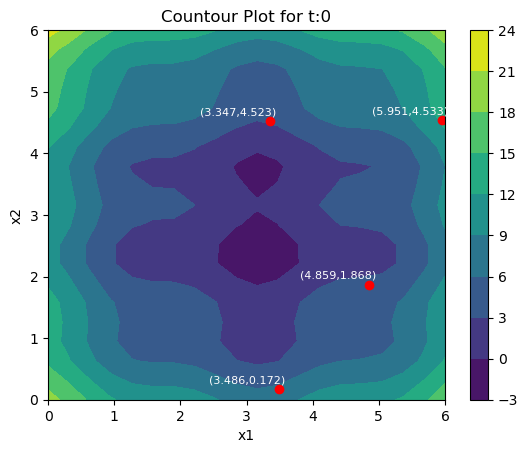

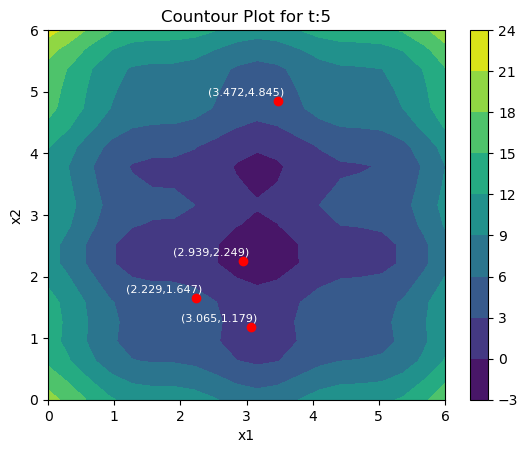

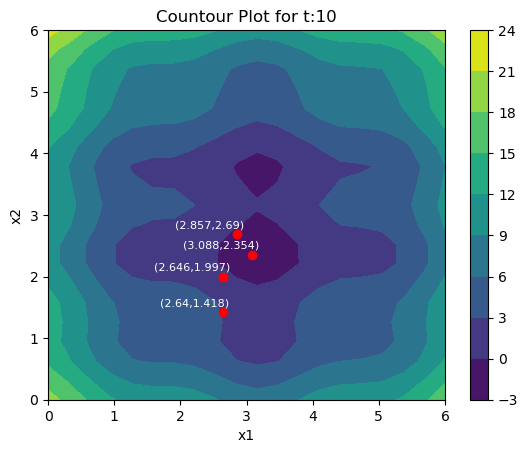

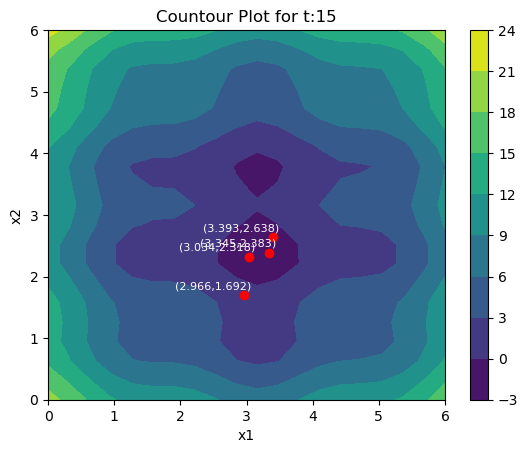

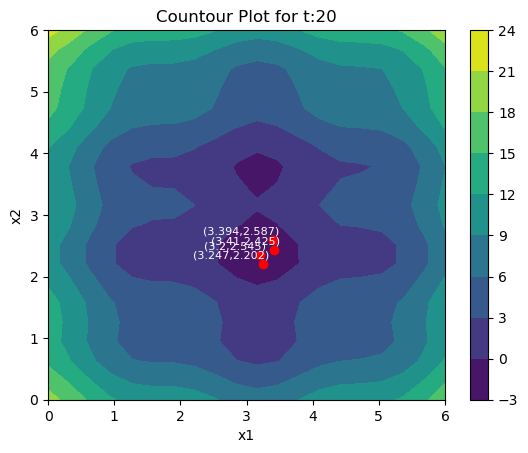

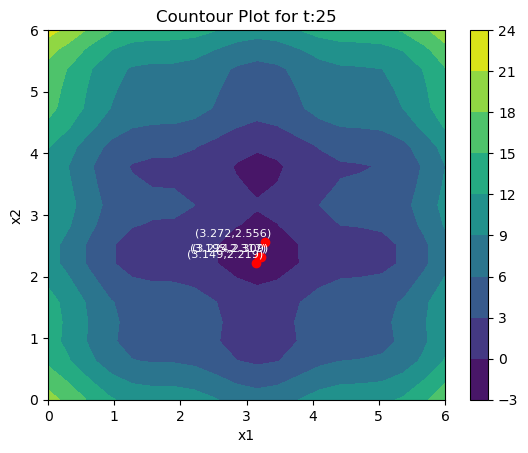

In [850]:
%matplotlib inline  
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#Create contour axis data
x1 = np.linspace(0, 6, 20)
x2 = np.linspace(0, 6, 20)
X2, X1 = np.meshgrid(x2, x1)
Z = f(X1, X2)
x = []
y = []
#Track time slots where contour should be ploted
subset = [0,5,10,15,20,25]
#Pull swarm data at selected time slots
track_swarm_subset = [track_swarm[i] for i in subset]
index = 0
for swarm in track_swarm_subset:
    for particle in swarm:
        #get x1 and x2 data for a particle
        x.append(round(particle['pos'][0],3))
        y.append(round(particle['pos'][1],3))
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X1, X2, Z)
    #Ad colorbar
    fig.colorbar(cp)
    #Set title and axis labels for chart
    ax.set_title('Countour Plot for t:{0}'.format(subset[index]))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    #Plot all 4 particles on the contour plot with text
    for i in range(len(x)):
        plt.text(x[i]+0.1, y[i]+0.1, f'({x[i]},{y[i]})', fontsize=8, color='white', ha='right')
    plt.scatter(x, y, color='red', marker='o')
    #reveal the plot
    plt.show()
    #Reset the positioning var 
    x=[]
    y=[]
    index = index + 1


# Plot the points
plt.show()
#fig

In [851]:
ax.view_init(50, 60)
fig

AttributeError: 'AxesSubplot' object has no attribute 'view_init'

# Q3 Genetic Algorithm

In [11]:
import random
import copy
#Function to generate initial population
def initial_population ():
    print("Initial Population")
    cities = [0, 1, 2, 3, 4, 5]
    population = []
    #Generate 8 parents with cities shuffled in random locations
    for i in range(8):
        random.shuffle(cities)
        copycities = cities.copy()
        population.append(copycities)
        
    #return initial population
    return population
    #Generate 8 parents in the initial_population
    
#Function to select parents for creating offspring
def tournament_select(population):
    #Track values
    objective_val = []
    indexes = []
    remaining = []
    #Parent index
    pindex = 1
    print("----------------Fitness values of population:")
    
    #Calculate fitness values for each parent in the current population
    for parent in population:
        value =  objective_func(parent)
        objective_val.append(value)
        print("Parent {0} - {1}".format(pindex, value))
        pindex = pindex + 1
    
    #Mean population fitness
    mean = round(sum(objective_val) / len(objective_val),3)
    print("Mean population fitness:{0}".format(mean))
    
    #Calculate relative probabilities of each function
    total = sum(objective_val)
    #1-probabily is used to give lower fitness values higher probability
    probabilities = [1 - obj / total for obj in objective_val]
    probabilities_dict = {}
    temp_i = 0
    #Create a dictionary with probabilities 
    for p in probabilities:
        probabilities_dict[temp_i]=p
        temp_i = temp_i+1
    #Create a deep copy to change values seperatly
    probabilities_dict_copy = copy.deepcopy(probabilities_dict)
    remaining = copy.deepcopy(probabilities_dict)
    
    #Generate 6 parents for tournament selection
    for j in range (6):
        probabilities_dict = copy.deepcopy(probabilities_dict_copy)
        #Track index and values seperately from original population
        choose_three_index = []
        choose_three_val = []
        #Choose 3 parents for tournament of 3
        for k in range (3):
            choose_one = random.choices(list(probabilities_dict.keys()), \
                                        weights=list(probabilities_dict.values()), k=1)
            #Remove parent probability to avoid reselecting the same parent
            del probabilities_dict[choose_one[0]]
            #Add selected parent to tracking var
            choose_three_index.append(choose_one[0])
        #Retrieve fitness values of 3 parents chosen
        choose_three_val = [probabilities_dict_copy[p] for p in choose_three_index] 
        #Return the parent with the lowest fitness value - minimisation
        the_chosen_one = choose_three_index[choose_three_val.index(min(choose_three_val))]
        indexes.append(the_chosen_one)
        #Remove parent from list for remaining tournament selection
        del probabilities_dict_copy[the_chosen_one]
    print("Parents selected for crossover:")
    for i in indexes:
        print("Parent {0}".format(i+1))
    
    #Return indexes of parents selected
    return indexes

#Function that creates offspring based on two-point-cross operator. 
#This operator is also modified for duplicates
def two_point_cross(population, parents):
    offspring = []
    print("----------------Cross-over operation")
    
    #Generate index of 1st and 2nd cut off point 5 spots abcdef 
    #0 - 1st is 1-4 or less 2nd is index of 1 +1 to 5 or less
    temp_child = []
    for i in range(3):
        #complete set of values
        complete = [0,1,2,3,4,5]
        #Track parents
        parent1 = i*2
        parent2 = i*2+1
        print("Pair{0} includes parent {1} and parent {2}". \
              format(i+1,parents[parent1]+1,parents[parent2]+1))
        #Create two points to cut the parent
        cut1 = random.randint(1, 4)
        cut2 = random.randint(cut1+1,5)
                # look for missing
        print("Pair{0} was cut at index {1} and index {2}".format(i+1,cut1,cut2))
        print("Parent {0} is {1}".format(parents[parent1]+1,population[parents[parent1]]))
        print("Parent {0} is {1}".format(parents[parent2]+1,population[parents[parent2]]))
        #Cuts will create 3 pieces per parent where parent = pre + mid + post
        pre1 = population[parents[parent1]][0:cut1]
        pre2 = population[parents[parent2]][0:cut1]
        mid1 = population[parents[parent1]][cut1:cut2]
        mid2 = population[parents[parent2]][cut1:cut2]
        post1 = population[parents[parent1]][cut2:6]
        post2 = population[parents[parent2]][cut2:6]
        #everything that is is pre1 and post1 that is also in mid2 
        #needs to be randomly replaced by remaining chars
        temp1 = pre1 + post1
        temp2 = pre2 + post2
        # test look for duplicates in newly created offspring
        duplicates1 = list(set(temp1).intersection(mid2))
        duplicates2 = list(set(temp2).intersection(mid1))
        #Look for values that are missing from complete set
        missing1= list(set(complete)-set(pre1+mid2+post1))
        missing2= list(set(complete)-set(pre2+mid1+post2))
        #Shuffle missing values 
        random.shuffle(missing1)
        random.shuffle(missing2)
        track = 0
        # replace duplicates with missing prioritize pre and post blocks for replacements
        for duplicate in duplicates1:
            if duplicate in pre1:
                pre1[pre1.index(duplicate)]=missing1[track]
            elif duplicate in post1:
                post1[post1.index(duplicate)]=missing1[track]
            track = track + 1
        track = 0
        #Repeate duplicate substitution for the second offspring
        for duplicate in duplicates2:
            if duplicate in pre2:
                pre2[pre2.index(duplicate)]=missing2[track]
            elif duplicate in post2:
                post2[post2.index(duplicate)]=missing2[track]
            track = track + 1
        #Reform offspring with duplicates removed
        offspring1 = pre1+mid2+post1
        print("Offspring {0} created: {1}".format(parent1+1, offspring1))
        offspring2 = pre2+mid1+post2
        print("Offspring {0} created: {1}".format(parent2+1,offspring2))
        offspring.append(offspring1)
        offspring.append(offspring2)
    
    #Return the 6 newly created offspring
    return offspring


#Function to perform swap mutation on a single solution   
def mutation(offspring):
    print("----------------Mutation:")
    #Select a random offspring from 6 total offspring
    random_offspring = random.randint(0, 5)
    print("Offspring {0} was selected for mutation".format(random_offspring))
    #Select the first bit 
    entry1 = random.randint(0, 5)
    #Select the second bit that the first bit will be swapped with
    entry2 = random.randint(0, 5)
    #Ensure that the bits are distinct and not in the same position
    while(entry1==entry2):
        entry2 = random.randint(0, 5)
        print("entry2{0}".format(entry2))
    print("Gene {0} and {1} was swapped".format(entry1+1,entry2+1))
    print("Offspring before mutation:{0}".format(offspring[random_offspring]))
    #Create a copy of the offspring selected
    temporary_offspring = offspring[random_offspring].copy()
    #Swap the bits that were selected
    offspring[random_offspring][entry2] = temporary_offspring[entry1]
    offspring[random_offspring][entry1] = temporary_offspring[entry2]
    print("Offspring after mutation:{0}".format(offspring[random_offspring]))
    
    #Return the full offspring list
    return offspring

#Function to select best solutions for next generation based on parents and offspring
def elitist(population,offspring):
    elitegroup = []
    #Parents and offspring to choose from added together
    totalgroup = population+offspring
    objective_val = []
    #Calculate fitness value for each member in big group
    for parent in totalgroup:
        value =  objective_func(parent)
        objective_val.append(value)
    #Sort the fitness values from low to high
    sorted_values = objective_val.copy()
    sorted_values.sort()
    index = []
    #Store indexes of the the samples with the lowest 8 fitness values
    for i in range(8):
        #Get the index in the population associated with a certain fitness value
        index.append(objective_val.index(sorted_values[i]))
        #Scratch out the lookup to prevent duplicates from being reselected 
        objective_val[objective_val.index(sorted_values[i])]="-1"
    #Add members from the total group that are associated with the 8 lowest fitness values 
    for i in index:
        elitegroup.append(totalgroup[i])
        
    #Return the elitegroup who will be the new population for the next generation
    return elitegroup

#Function to calculate fitness value of a solution
def objective_func(parent):
    #Distance cost matrix
    distance_mat = [[0,32,39,42,29,35],\
                    [32,0,36,27,41,25],\
                    [39,36,0,28,33,40],\
                    [42,27,28,0,27,38],\
                    [29,41,33,27,0,26],\
                    [35,25,40,38,26,0]]
    objective_func_val = 0
    #Calculate the fitness values for a parent
    for p in parent:
        #Lookup right row and column in table
        if(parent.index(p)+1 < 6):
            temp = distance_mat[p][parent[parent.index(p)+1]]
        #If the last column is selected it needs to rollover to the first column
        else:
            temp = distance_mat[p][parent[0]]
        objective_func_val = objective_func_val + temp
        
    #Return the fitness value of a entitty
    return objective_func_val

#Initialization vars
#Track 8 generations without change in candidate solution
track_changes = 0
#Tracks the best solution set to a large number initially 
candidate_sol = {"z":100000}
#Generate initial population
population2 = initial_population()
#Track iteration of experiment
iteration = 1

#Continue will candidate solution has not changed for 8 generations
while(track_changes <8):
    print("==================================Generation: {0}".format(iteration))
    print("----------------Population:")
    pindex = 1
    #Output population
    for p in population2:
        print("Parent {0} - {1}".format(pindex, p))
        pindex=pindex+1
    #Tournament selection
    parents = tournament_select(population2)
    #Perform two-poin cross over
    offspring = two_point_cross(population2, parents)
    #Mutate an entitty
    offspring = mutation(offspring)
    #Select the next generation
    next_gen = elitist(population2,offspring)
    population2 = next_gen
    #Check if the fitness value of the current gen is better than the one found 
    in previous generations
    if(objective_func(next_gen[0])<candidate_sol["z"]):
        candidate_sol["s"] = next_gen[0]
        candidate_sol["z"] = objective_func(next_gen[0])
        #Reset 8 generation tracker if change is made
        track_changes = 0
    else:
        #Increment 8 generation tracker if no change is made
        track_changes = track_changes + 1
    print("Best solution for generation:{0} with fitness {1}". \
          format(candidate_sol["s"],candidate_sol["z"]))
    #Increment the iteration of the experiment
    iteration = iteration + 1
print("Candidate solution {0} with fitness {1}".format(candidate_sol["s"],candidate_sol["z"]))



Initial Population
==================================Generation: 1
----------------Population:
Parent 1 - [5, 1, 3, 2, 0, 4]
Parent 2 - [3, 2, 0, 4, 1, 5]
Parent 3 - [3, 1, 4, 0, 5, 2]
Parent 4 - [5, 2, 4, 0, 3, 1]
Parent 5 - [5, 3, 1, 4, 0, 2]
Parent 6 - [0, 3, 1, 2, 4, 5]
Parent 7 - [3, 0, 1, 5, 2, 4]
Parent 8 - [2, 5, 4, 1, 0, 3]
----------------Fitness values of population:
Parent 1 - 174
Parent 2 - 200
Parent 3 - 200
Parent 4 - 196
Parent 5 - 214
Parent 6 - 199
Parent 7 - 199
Parent 8 - 209
Mean population fitness:198.875
Parents selected for crossover:
Parent 2
Parent 3
Parent 5
Parent 7
Parent 8
Parent 6
----------------Cross-over operation
Pair1 includes parent 2 and parent 3
Pair1 was cut at index 1 and index 2
Parent 2 is [3, 2, 0, 4, 1, 5]
Parent 3 is [3, 1, 4, 0, 5, 2]
Offspring 1 created: [3, 1, 0, 4, 2, 5]
Offspring 2 created: [3, 2, 4, 0, 5, 1]
Pair2 includes parent 5 and parent 7
Pair2 was cut at index 3 and index 4
Parent 5 is [5, 3, 1, 4, 0, 2]
Parent 7 is [3, 0, 1, 5

In [1]:
mylist = ["a","b"]
a = random.shuffle(mylist)

NameError: name 'random' is not defined

In [623]:
a = [1,2,3]
total = sum(a)
[b / total for b in a]


[0.16666666666666666, 0.3333333333333333, 0.5]

In [658]:
test = ['a','b','c','d','e','f']
random.choice(test, weights=[0.2,0.2,0.2,0.2,0.2,0.2],k=3)

TypeError: choice() got an unexpected keyword argument 'weights'

In [741]:
a = ["a","b","b","c"]
a.pop(2)

'b'

In [742]:
a

['a', 'b', 'c']